<a href="https://colab.research.google.com/github/Intelligence-Engineering-LAB-KU/Seminar/blob/master/summer_2020/Fourier_analysis_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as display
from matplotlib.animation import FuncAnimation
from IPython.display import HTML 
    
def plot_signal (xn):
    plt.plot(xn)
    plt.show()
    
def plot_complex_signal (xn):
    plt.plot(xn.real)
    plt.plot(xn.imag)
    plt.show()

## Symmetry in DFT outputs

In this post, we will cover some symmetric characteristics In DFS results.

### 1. Magnitude and Phase Decomposition

Let us start with a sinusoidal signal with Gaussian noise f[n].

$f[n] = 5cos(\frac{2\pi}{16}n + \frac{4\pi}{16}) + \mathcal{N}(0,1)$


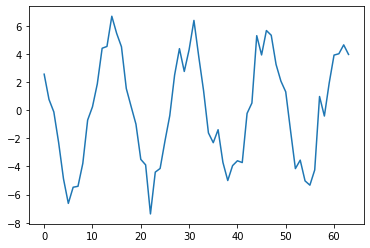

In [40]:
def f(n):
    return 5*np.cos(2*np.pi/16 * n + 4*np.pi/16 ) +  np.random.randn()

def mk_xn(f, N=64):
    return np.array([f(n) for n in range(N)])

fn = mk_xn(f)
plot_signal(fn)

Let us apply DFS to $f[n]; n=0,1,...63$

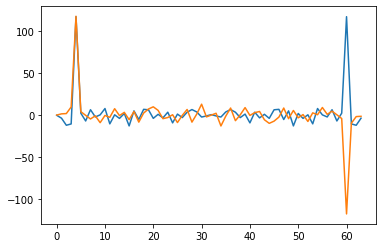

In [41]:
def dft(xn, noise_cancle=True):
    def w_kn(n, N, k):
        return np.exp(1j*2*np.pi*n*k/N)
    N = len(xn)
    basis = [np.array([w_kn(n, N, k) for n in range(N)]) for k in range(N)]
    xkn = np.array([np.dot(w_k.conj().T, xn) for w_k in basis])
    return xkn
    
xkn = dft(fn)

plot_complex_signal(xkn)

The plotted result shows that two coefficients $X[4]$, $X[60]$ are dominant.

It seems that it has some symmetric structure, but it is a bit hard to see what happened exactly.

Instead of plotting complex-valued coifficients, let us plot the magnitude and phase which are defined as:

- Magintude: $|X[k]|=\sqrt{ {\mathcal{R}[X[k]]}^2 + {\mathcal{J}[X[k]]}^2 }$

- Phase: $\angle X[k]=atan2(\frac{\mathcal{J}[X[k]]}{\mathcal{R}[X[k]]})$

Let us plot these.

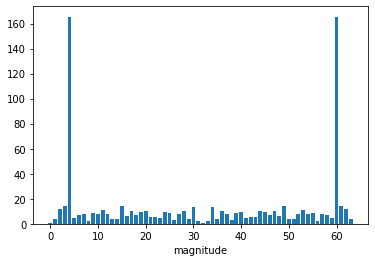

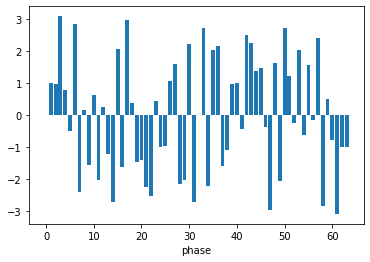

In [42]:
def mag_phase(xkn, noise_cancle=True):
    mag = np.sqrt(xkn.real **2 + xkn.imag **2)
    phase2 = np.angle(xkn)  # = np.arctan2(xkn.imag, xkn.real)

    if(noise_cancle):
        xkn [mag < 1e-10] = 0
        phase[mag < 1e-10] = 0
        mag [mag < 1e-10] = 0
    return mag, phase
    
mag, phase = mag_phase(xkn)

plt.bar(range(len(mag)), mag)
plt.xlabel('magnitude')
plt.show()    

plt.bar(range(len(phase)), phase)
plt.xlabel('phase')
plt.show()    

### 2. Symmetric Structures

Now it is easy to see that:

- $|X[k]| - |X[N-k]| = 0$ holds for $k=1,2,...,31$

- $\angle X[k] + \angle X[N-k] =0$ holds for $k=1,2,...,31$

In [43]:
N=len(mag)
threshold = 1e-10
for k in range(1,N//2):
  print('mag[', k,'] - mag[ N -', k,']= 0' if mag[k]-mag[N-k] < threshold else 'exception')
  print('phase[', k,'] + phase[ N -', k,']= 0' if phase[k]+phase[N-k] < threshold else 'exception')
  break # comment this to check full iterations


mag[ 1 ] - mag[ N - 1 ]= 0
phase[ 1 ] + phase[ N - 1 ]= 0


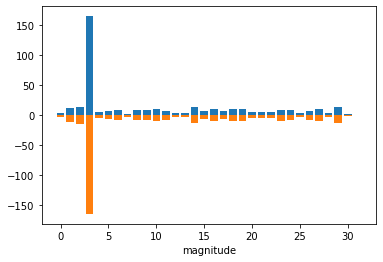

In [44]:
mag_half_neg = mag[1:len(mag)//2]
mag_half_pos = mag[len(mag)//2:]

plt.bar(range(len(mag_half_pos)), list(reversed(mag_half_pos)))
plt.bar(range(len(mag_half_neg)), -mag_half_neg)

plt.xlabel('magnitude')
plt.show()    

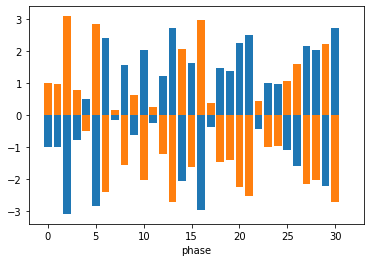

In [45]:
phase_half_neg = phase[1:len(phase)//2]
phase_half_pos = phase[len(phase)//2:]

plt.bar(range(len(phase_half_pos)), list(reversed(phase_half_pos)))
plt.bar(range(len(phase_half_neg)), phase_half_neg)

plt.xlabel('phase')
plt.show()    

###  3. Mathematical Explanation

Recall that Fourier basis for $\mathbb{C}^N$ is defined as follows:

$W = \{w_k[n]=e^{j \frac{2\pi}{N}nk} ;n=0,1,...,N-1 | k \in \{0,1,...,N-1\} \}$ 

#### Observation 1: $w_{N-k}[n]$  is conjugate to $w_{k}[n]$ 

$w_{N-k}[n] =  e^{j \frac{2\pi}{N}n(N-k)} ;n=0,1,...,N-1$ 


$=e^{j \frac{2\pi}{N}nN - j \frac{2\pi}{N}nk }$

$=e^{j 2\pi n - j \frac{2\pi}{N}nk }$

$=e^{j 2\pi n} * e^{ - j \frac{2\pi}{N}nk }$

$=(cos2\pi n + jsin2\pi n) * e^{ - j \frac{2\pi}{N}nk }$

$=(1) * e^{ - j \frac{2\pi}{N}nk }$

$= e^{ - j \frac{2\pi}{N}nk } = cos (-\frac{2\pi}{N}nk) + jsin(-\frac{2\pi}{N}nk)  =  cos (\frac{2\pi}{N}nk) - jsin(\frac{2\pi}{N}nk) $

$= (cos (\frac{2\pi}{N}nk) + jsin(\frac{2\pi}{N}nk))^* = (e^{j \frac{2\pi}{N}nk })^*$, where $x^*$ means conj of x



$\therefore w_{N-k}[n] = (e^{j \frac{2\pi}{N}nk })^* = (w_{k}[n])^*; n = 0,1,...,N-1$

#### Claim: $(\forall n=0,1,...,N-1 : \mathcal{J}(x[n])=0)  \rightarrow (X[k])^* = X[N-k] $.

suppose that $x[n]; n=0,1,...,N-1$ is an arbitrary '**complex-valued**' signal.

Recall that, $X[k] = \sum_{n=0}^{N-1}( w_k[n])^*x[n]$

$X[k] = \sum_{n=0}^{N-1} { (w_{k}[n]})^* x[n] $
 
$= \sum_{n=0}^{N-1} { (cos(\frac{2\pi}{N}nk) - jsin(\frac{2\pi}{N}nk))  * ( \mathcal{R}(x[n]) + j*\mathcal{J}(x[n]))} $
 
$= \sum_{n=0}^{N-1} { [cos(\frac{2\pi}{N}nk)\mathcal{R}(x[n]) +  sin(\frac{2\pi}{N}nk)\mathcal{J}(x[n])]
 + j [cos(\frac{2\pi}{N}nk)\mathcal{J}(x[n]) -  sin(\frac{2\pi}{N}nk)\mathcal{R}(x[n])] }  $


Hence, we also know that $w_{N-k}[n] = (w_{k}[n])^*; n = 0,1,...,N-1$

Therefore, 

$X[N-k] = \sum_{n=0}^{N-1}( w_{N-k}[n])^*x[n] = \sum_{n=0}^{N-1} { w_{k}[n]} * x[n] $
     
 $= \sum_{n=0}^{N-1} { (cos(\frac{2\pi}{N}nk) + jsin(\frac{2\pi}{N}nk))  * ( \mathcal{R}(x[n]) + j*\mathcal{J}(x[n]))} $
 
  $= \sum_{n=0}^{N-1} { [cos(\frac{2\pi}{N}nk)\mathcal{R}(x[n]) -  sin(\frac{2\pi}{N}nk)\mathcal{J}(x[n])]
 + j [cos(\frac{2\pi}{N}nk)\mathcal{J}(x[n]) +  sin(\frac{2\pi}{N}nk)\mathcal{R}(x[n])] }  $
 

---

Suppose that every imaginary part of x[n] is zero, that is, $\mathcal{J}(x[n])=0$ holds $\forall n=0,1,...,N-1$.

Then we can simplify those equations as follows:

$X[k] = \sum_{n=0}^{N-1} { [cos(\frac{2\pi}{N}nk)\mathcal{R}(x[n])]  - j [sin(\frac{2\pi}{N}nk)\mathcal{R}(x[n])] }  $
  
$X[N-k] = \sum_{n=0}^{N-1} { [cos(\frac{2\pi}{N}nk)\mathcal{R}(x[n])] + j [ sin(\frac{2\pi}{N}nk)\mathcal{R}(x[n])] }  $

$\therefore (\forall n=0,1,...,N-1 : \mathcal{J}(x[n])=0)  \rightarrow (X[k])^* = X[N-k] $.

## Reference

https://www.coursera.org/learn/dsp1/lecture/qL3Po/1-3-1-b-the-dft-as-a-change-of-basis